In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
import pkg_resources

In [2]:
dat_0 = np.genfromtxt('2018-12-18_09-26-58\pos_log_file_0.csv', delimiter=',', skip_header=False)
dat_1 = np.genfromtxt('2018-12-18_09-26-58\pos_log_file_1.csv', delimiter=',', skip_header=False)

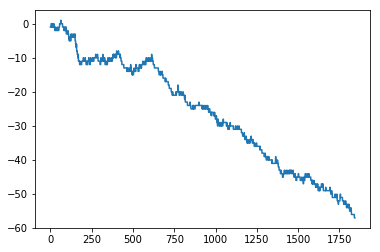

[   12    27    42 ... 27342 27357 27372]
[   13    28    43 ... 27399 27414 27429]


In [3]:
led_0 = dat_0[:,3]
led_1 =dat_1[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
i_diff = i_0-i_1
plt.plot(i_diff)
plt.show()
print(i_0)
print(i_1)

In [4]:
if len(led_0) > len(led_1):
    dat_0f = dat_0
    dat_1f = np.full_like(dat_0f, np.nan)
    for i in range(len(i_1)-1):
        dat_0f[i_1[i]:i_1[i]+(i_0[i+1]-i_0[i])] = dat_0[i_0[i]:i_0[i+1]]
elif len(led_0) < len(led_1):
    dat_1f = dat_1
    dat_0f = np.full_like(dat_1f, np.nan)
    for i in range(len(i_1)-1):
        dat_0f[i_1[i]:i_1[i]+(i_0[i+1]-i_0[i])] = dat_0[i_0[i]:i_0[i+1]]

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


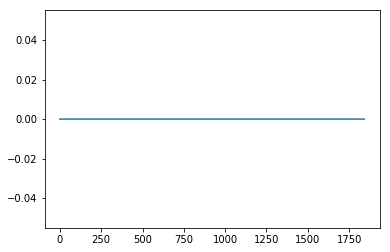

In [5]:
led_0 = dat_0f[:,3]
led_1 =dat_1f[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
i_diff = i_0 - i_1[:len(i_0)]
plt.plot(i_diff)

In [6]:

pos_log_file_0 = open('pos_log_file_test_0.csv', 'w')
pos_log_file_1 = open('pos_log_file_test_1.csv', 'w')

for i in range(len(dat_0f)):
    pos_log_file_0.write('{}, {}, {}, {}\n'.format(dat_0f[i,0],dat_0f[i,1],dat_0f[i,2],dat_0f[i,3]))
    
for i in range(len(dat_1f)):
    pos_log_file_1.write('{}, {}, {}, {}\n'.format(dat_1f[i,0],dat_1f[i,1],dat_1f[i,2],dat_1f[i,3]))
    

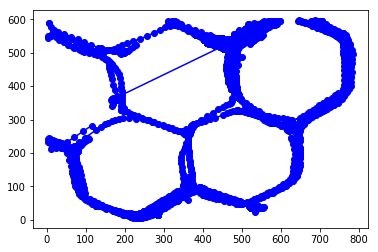

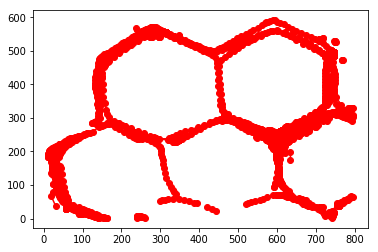

In [7]:
plt.plot(dat_0f[:,0], dat_0f[:,1], 'blue', marker = 'o')
plt.show()
plt.plot(dat_1f[:,0], dat_1f[:,1], 'red', marker = 'o')